In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import seaborn as sn
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("APA-DDoS-Dataset\APA-DDoS-Dataset.csv")

In [7]:
data.head()

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

In [11]:
missing_data = data.isnull().sum()
print(missing_data)

ip.src             0
ip.dst             0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
frame.time         0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Label              0
dtype: int64


In [13]:
data['Label'].value_counts()

Label
Benign          75600
DDoS-PSH-ACK    37800
DDoS-ACK        37800
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

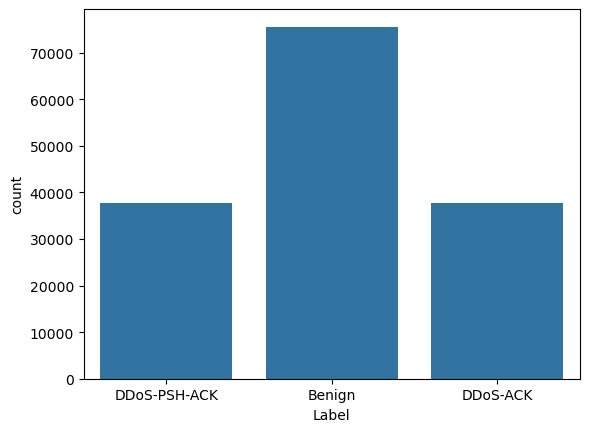

In [15]:
import seaborn as sns
sns.countplot(x="Label", data = data)

In [17]:
data = data.drop(['ip.src', 'ip.dst','frame.time'], axis=1)

In [19]:
data.to_csv('processed.csv')

In [21]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()

data['Label']= label_encoder.fit_transform(data['Label'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   tcp.srcport      151200 non-null  int64
 1   tcp.dstport      151200 non-null  int64
 2   ip.proto         151200 non-null  int64
 3   frame.len        151200 non-null  int64
 4   tcp.flags.syn    151200 non-null  int64
 5   tcp.flags.reset  151200 non-null  int64
 6   tcp.flags.push   151200 non-null  int64
 7   tcp.flags.ack    151200 non-null  int64
 8   ip.flags.mf      151200 non-null  int64
 9   ip.flags.df      151200 non-null  int64
 10  ip.flags.rb      151200 non-null  int64
 11  tcp.seq          151200 non-null  int64
 12  tcp.ack          151200 non-null  int64
 13  Packets          151200 non-null  int64
 14  Bytes            151200 non-null  int64
 15  Tx Packets       151200 non-null  int64
 16  Tx Bytes         151200 non-null  int64
 17  Rx Packets       151200 non-n

In [25]:
data.columns

Index(['tcp.srcport', 'tcp.dstport', 'ip.proto', 'frame.len', 'tcp.flags.syn',
       'tcp.flags.reset', 'tcp.flags.push', 'tcp.flags.ack', 'ip.flags.mf',
       'ip.flags.df', 'ip.flags.rb', 'tcp.seq', 'tcp.ack', 'Packets', 'Bytes',
       'Tx Packets', 'Tx Bytes', 'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')

In [27]:
X = data[['tcp.srcport', 'tcp.dstport', 'ip.proto',
       'frame.len', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.df', 'ip.flags.rb', 'tcp.seq',
       'tcp.ack', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes',
       'Rx Packets', 'Rx Bytes',]]
y = data['Label']

In [29]:
X

,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,ip.flags.mf,ip.flags.df,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
0,2412,8000,6,54,0,0,1,1,0,0,0,1,1,8,432,4,216,4,216
1,2413,8000,6,54,0,0,1,1,0,0,0,1,1,10,540,5,270,5,270
2,2414,8000,6,54,0,0,1,1,0,0,0,1,1,12,648,6,324,6,324
3,2415,8000,6,54,0,0,1,1,0,0,0,1,1,10,540,5,270,5,270
4,2416,8000,6,54,0,0,1,1,0,0,0,1,1,6,324,3,162,3,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,37360,8000,6,66,0,0,0,1,0,1,0,1,1,10,1146,6,560,4,586
151196,37362,8000,6,66,0,0,0,1,0,1,0,1,1,10,1151,6,560,4,591
151197,37364,8000,6,66,0,0,0,1,0,1,0,1,1,10,1144,6,560,4,584
151198,37366,8000,6,66,0,0,0,1,0,1,0,1,1,10,1175,6,560,4,615


In [31]:
y

0         2
1         2
2         2
3         2
4         2
         ..
151195    0
151196    0
151197    0
151198    0
151199    0
Name: Label, Length: 151200, dtype: int32

# Data Splitting

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[22664     0     0]
 [    0 11228     0]
 [    0     0 11468]]


In [21]:
print("*Classification Matrix for RF: ")
print(classification_report(y_test, predictions))

*Classification Matrix for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22664
           1       1.00      1.00      1.00     11228
           2       1.00      1.00      1.00     11468

    accuracy                           1.00     45360
   macro avg       1.00      1.00      1.00     45360
weighted avg       1.00      1.00      1.00     45360



In [38]:
val1 = accuracy_score(y_test, predictions) *100
print(val1)

100.0


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y_test, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y_test, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y_test, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y_test, predictions))

Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Kappa Score: 1.000


# Decision Tree

In [43]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[22664     0     0]
 [    0 11228     0]
 [    0     0 11468]]


In [45]:
print("*Classification Matrix for DT: ")
print(classification_report(y_test, predictions))

*Classification Matrix for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22664
           1       1.00      1.00      1.00     11228
           2       1.00      1.00      1.00     11468

    accuracy                           1.00     45360
   macro avg       1.00      1.00      1.00     45360
weighted avg       1.00      1.00      1.00     45360



In [47]:
val2 = accuracy_score(y_test, predictions) *100
print("accuracy score for DT : ", val2)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y_test, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y_test, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y_test, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y_test, predictions))

accuracy score for DT :  100.0
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Kappa Score: 1.000


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for KNN: 
[[22664     0     0]
 [    0  7053  4175]
 [    0  4035  7433]]


In [50]:
print("*Classification Matrix for KNN: ")
print(classification_report(y_test, predictions))

*Classification Matrix for KNN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22664
           1       0.64      0.63      0.63     11228
           2       0.64      0.65      0.64     11468

    accuracy                           0.82     45360
   macro avg       0.76      0.76      0.76     45360
weighted avg       0.82      0.82      0.82     45360



In [54]:
val3 = accuracy_score(y_test, predictions) *100
print("accuracy score for KNN : ",val3)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y_test, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y_test, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y_test, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y_test, predictions))

accuracy score for KNN :  81.90035273368606
Precision: 0.819
Recall: 0.819
F1 Score: 0.819
Kappa Score: 0.710


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0)
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for LR: 
[[22664     0     0]
 [    0 11228     0]
 [    0     0 11468]]


In [58]:
print("*Classification Matrix for LR: ")
print(classification_report(y_test, predictions))

*Classification Matrix for LR: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22664
           1       1.00      1.00      1.00     11228
           2       1.00      1.00      1.00     11468

    accuracy                           1.00     45360
   macro avg       1.00      1.00      1.00     45360
weighted avg       1.00      1.00      1.00     45360



In [59]:
val4 = accuracy_score(y_test, predictions) *100
print("accuracy score for LR: ",val4)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y_test, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y_test, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y_test, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y_test, predictions))

accuracy score for LR:  100.0
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Kappa Score: 1.000


# Voting Classifier

In [64]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[75600     0     0]
 [    0 37800     0]
 [    0     0 37800]]


In [65]:
print("*Classification Matrix for Voting Classifier: ")
print(classification_report(y, predictions))

*Classification Matrix for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75600
           1       1.00      1.00      1.00     37800
           2       1.00      1.00      1.00     37800

    accuracy                           1.00    151200
   macro avg       1.00      1.00      1.00    151200
weighted avg       1.00      1.00      1.00    151200



In [66]:
val5 = accuracy_score(y, predictions) *100
print(" accuracy score for VC : ", val5)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y, predictions))

 accuracy score for VC :  100.0
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Kappa Score: 1.000


# XGBoost

In [36]:
from xgboost import XGBClassifier
clf1 = XGBClassifier()
clf1.fit(X,y)
predictions = clf1.predict(X)
print("*Confusion Matrix for XGBoost: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for XGBoost: 
[[75600     0     0]
 [    0 37800     0]
 [    0     0 37800]]


In [37]:
print("*Classification Matrix for ANN: ")
print(classification_report(y, predictions))

*Classification Matrix for ANN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75600
           1       1.00      1.00      1.00     37800
           2       1.00      1.00      1.00     37800

    accuracy                           1.00    151200
   macro avg       1.00      1.00      1.00    151200
weighted avg       1.00      1.00      1.00    151200



In [38]:
val6 = accuracy_score(y, predictions) *100
print("accuracy score for ANN" ,val6)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y, predictions))

accuracy score for ANN 100.0
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Kappa Score: 1.000


# SVM

In [39]:
from sklearn.svm import SVC

In [40]:
clf_fuzz = SVC()
clf_fuzz.fit(X_train, y_train)
predictions = clf_fuzz.predict(X_test)
print("*Confusion Matrix for SVC: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for SVC: 
[[22664     0     0]
 [    0  3185  8043]
 [    0  2529  8939]]


In [41]:
print("*Classification Matrix for SVC: ")
print(classification_report(y_test, predictions))

*Classification Matrix for SVC: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22664
           1       0.56      0.28      0.38     11228
           2       0.53      0.78      0.63     11468

    accuracy                           0.77     45360
   macro avg       0.69      0.69      0.67     45360
weighted avg       0.77      0.77      0.75     45360



In [42]:
val7 = accuracy_score(y_test, predictions) *100
print("accuracy score for SVC : ",val7)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y_test, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y_test, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y_test, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y_test, predictions))

accuracy score for SVC :  76.6931216931217
Precision: 0.771
Recall: 0.767
F1 Score: 0.752
Kappa Score: 0.627


# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
clf_fuzz = GaussianNB()
clf_fuzz.fit(X_train, y_train)
predictions = clf_fuzz.predict(X_test)
print("*Confusion Matrix for NB: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for NB: 
[[22664     0     0]
 [    0 11228     0]
 [    0    46 11422]]


In [44]:
print("*Classification Matrix for NB: ")
print(classification_report(y_test, predictions))

*Classification Matrix for NB: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22664
           1       1.00      1.00      1.00     11228
           2       1.00      1.00      1.00     11468

    accuracy                           1.00     45360
   macro avg       1.00      1.00      1.00     45360
weighted avg       1.00      1.00      1.00     45360



In [45]:
val8 = accuracy_score(y_test, predictions) *100
print("accuracy score for NB: ",val8)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y_test, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y_test, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y_test, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y_test, predictions))

accuracy score for NB:  99.89858906525572
Precision: 0.999
Recall: 0.999
F1 Score: 0.999
Kappa Score: 0.998


# MLP - ANN

In [46]:
from sklearn.neural_network import MLPClassifier
clf_fuzz = MLPClassifier(random_state=1, max_iter=300)
clf_fuzz.fit(X, y)
predictions = clf_fuzz.predict(X)
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y, predictions))

print("*Classification Matrix for ANN: ")
print(classification_report(y, predictions))

*Confusion Matrix for ANN: 
[[75600     0     0]
 [    0 37800     0]
 [    0     0 37800]]
*Classification Matrix for ANN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75600
           1       1.00      1.00      1.00     37800
           2       1.00      1.00      1.00     37800

    accuracy                           1.00    151200
   macro avg       1.00      1.00      1.00    151200
weighted avg       1.00      1.00      1.00    151200



In [47]:
val8a = accuracy_score(y, predictions) *100
print("accuracy score for ANN : ",val8a)
from sklearn.metrics import precision_score, recall_score, f1_score,cohen_kappa_score
print('Precision: %.3f' % precision_score(y, predictions,average='weighted'))

print('Recall: %.3f' % recall_score(y, predictions,average='weighted'))

print('F1 Score: %.3f' % f1_score(y, predictions,average='weighted'))

print('Kappa Score: %.3f' % cohen_kappa_score(y, predictions))

accuracy score for ANN :  100.0
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
Kappa Score: 1.000


# K-Means

In [48]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(X)

In [49]:
data1 = pd.DataFrame(dataset_scaled)
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.018594,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368421,0.321702,0.333333,0.319527,0.4,0.323353
1,0.018611,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473684,0.413617,0.444444,0.426036,0.5,0.404192
2,0.018628,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.578947,0.505532,0.555556,0.532544,0.6,0.485030
3,0.018644,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473684,0.413617,0.444444,0.426036,0.5,0.404192
4,0.018661,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263158,0.229787,0.222222,0.213018,0.3,0.242515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,0.604027,0.0,0.0,0.071006,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.473684,0.929362,0.555556,0.998028,0.4,0.877246
151196,0.604061,0.0,0.0,0.071006,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.473684,0.933617,0.555556,0.998028,0.4,0.884731
151197,0.604094,0.0,0.0,0.071006,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.473684,0.927660,0.555556,0.998028,0.4,0.874251
151198,0.604128,0.0,0.0,0.071006,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.473684,0.954043,0.555556,0.998028,0.4,0.920659


In [50]:
X = data1.iloc[:, 0:41].values
Y = y.values

In [51]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [52]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [53]:
print(KMeans_Clustering.cluster_centers_)

[[ 1.25114424e-01  0.00000000e+00  0.00000000e+00 -2.77555756e-15
   0.00000000e+00  0.00000000e+00  5.01197773e-01  0.00000000e+00
   0.00000000e+00  6.17284002e-14  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.77195446e-01  3.29363853e-01  3.44257390e-01
   3.29998208e-01  4.06839697e-01  3.28882390e-01]
 [ 7.48182756e-01  0.00000000e+00  0.00000000e+00  5.33920588e-01
   0.00000000e+00  0.00000000e+00  5.01166620e-01  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.73684211e-01  9.39572299e-01  5.55555556e-01
   9.98226905e-01  4.00000000e-01  8.95054507e-01]]


In [54]:
#prediction using kmeans and accuracy
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00   15169.0
           1       0.00      0.00      0.00    7608.0
           2       0.00      0.00      0.00    7463.0

    accuracy                           0.00   30240.0
   macro avg       0.00      0.00      0.00   30240.0
weighted avg       0.00      0.00      0.00   30240.0



# Comparison

In [55]:
score = [val1,val2,val3,val4,val5,val6,val7,val8,val8a]

In [56]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','KNN','LR','Voting Classifier','XGB','SVM','Naive Bayes','MLP-ANN')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8]
[100.0, 100.0, 81.90035273368606, 100.0, 100.0, 100.0, 76.6931216931217, 99.89858906525572, 100.0]


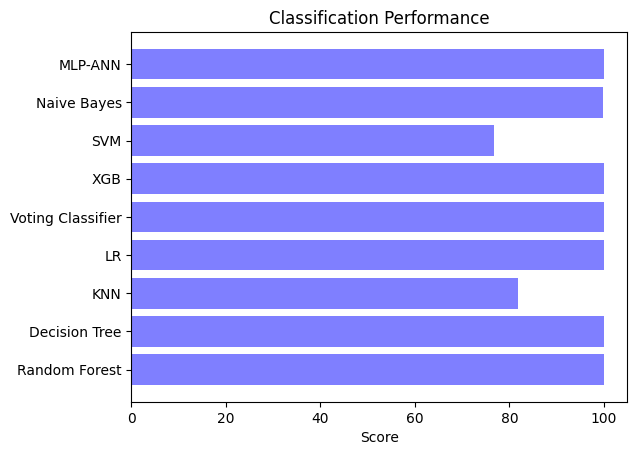

In [57]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [58]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']